In [1]:
import pandas as pd 
from analysis.compare_observed_datasets import preprocessSoil

from hydra import initialize, compose

with initialize(version_base=None, config_path="conf"):
    cfg = compose(config_name="config")
pred = pd.read_csv('data/emulation_df.csv')
sothe = preprocessSoil(cfg)

/Users/gclyne/thesis/env/lib/python3.9/site-packages/xarray/conventions.py:521: SerializationWarning: variable 'cSoilAbove1m' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


In [12]:
pred_2015 = pred[pred['year']==2015]
pred_2015['lat'] = pred_2015['lat'].round(6)
sothe['lat'] = sothe['lat'].round(6)

/var/folders/1g/_wddvqdx1zn1sqjjw3s9m2940000gt/T/ipykernel_56535/1784616889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_2015['lat'] = pred_2015['lat'].round(6)


In [48]:
merged = pd.merge(sothe,pred_2015,on=['lat','lon'],how='inner')

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

#merge pred and sothe and visualize r2 value
def visualize_r2(predicted,actual):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.scatter(predicted, actual, s=100, edgecolor="black",linewidth=0.5)
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Observed")
    ax.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'k--', lw=4)

    ax.annotate("r-squared = {:.3f}".format(r2_score(actual, predicted)), (0, 1))

    plt.show()

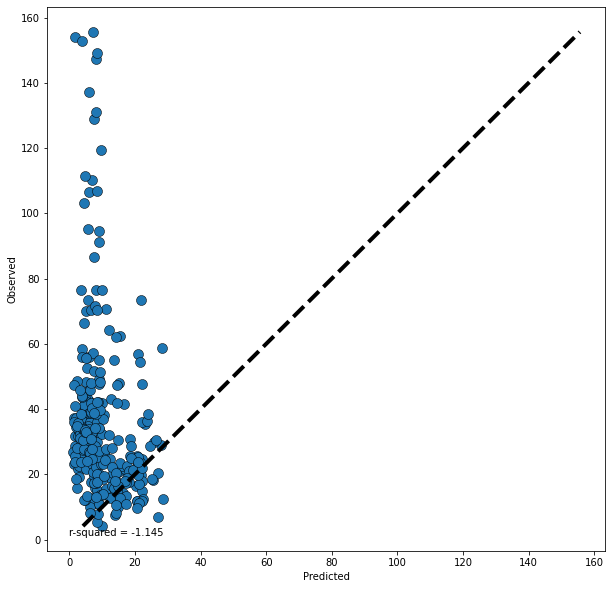

In [53]:
visualize_r2(merged['cSoilAbove1m_y'],merged['cSoilAbove1m_x'])

# r2_score(merged['cSoilAbove1m_y'],merged['cSoilAbove1m_x'])

In [35]:
import numpy
numpy.corrcoef(merged['cSoilAbove1m_y'],merged['cSoilAbove1m_x'])

array([[ 1.        , -0.21594161],
       [-0.21594161,  1.        ]])

In [38]:
corr_matrix = numpy.corrcoef(merged['cSoilAbove1m_y'],merged['cSoilAbove1m_x'])
corr = corr_matrix[0,1]
R_sq = corr**2
R_sq

0.04663077887348959

In [39]:
r2_score(merged['cSoilAbove1m_y'],merged['cSoilAbove1m_x'])

-34.38717345910604